# Employee_Resignation_Prediction
## By:- Jitendra Sanjay Bhavsar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"D:\Jitu\Jitendra\J Dataset\resignation.csv",encoding='latin-1')

In [3]:
data

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [5]:
data.isnull().sum()    # From this we can say that our dataset in not present null value.

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["gender"] = data["gender"].map({'m':1, 'f':0 })
data["industry"] = le.fit_transform(data["industry"])
data["profession"] = le.fit_transform(data["profession"])
data["traffic"] = le.fit_transform(data["traffic"])
data["coach"] = le.fit_transform(data["coach"])
data["head_gender"] = le.fit_transform(data["head_gender"])
data["greywage"] = le.fit_transform(data["greywage"])
data["way"] = le.fit_transform(data["way"])


In [7]:
data

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,2,6,4,1,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,2,6,2,1,1,1,0,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0,35.0,8,6,4,1,1,1,0,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0,35.0,8,6,4,1,1,1,0,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,1,32.0,10,2,7,2,0,1,0,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,0,41.0,2,6,4,0,1,1,0,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,0,41.0,2,6,4,0,1,1,0,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,0,34.0,12,0,0,1,0,1,0,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,0,51.0,4,6,2,1,1,0,0,3.8,7.6,5.7,6.3,5.2


### Check Normality of the data---- 1) Histogram     2) ChiSquare Test

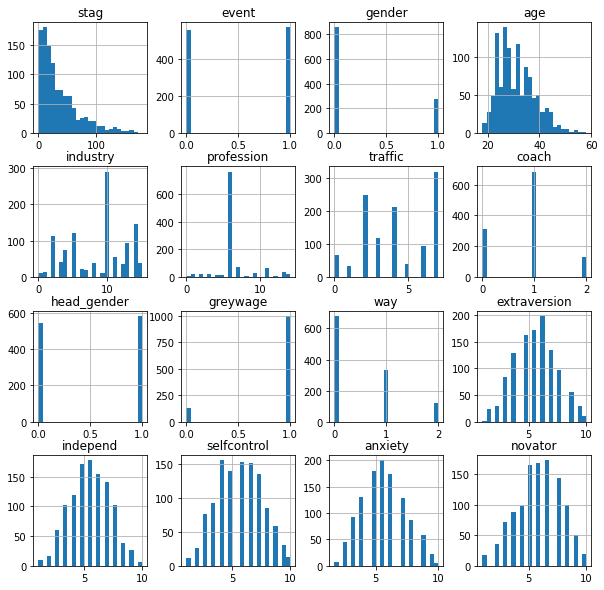

In [8]:
data.hist(bins = 25, figsize=(10,10))
plt.show()

In [9]:
from scipy.stats import chisquare
chisquare(data)

Power_divergenceResult(statistic=array([35803.34402815,   558.        ,   853.        ,  1777.16666118,
        2346.15114127,  1086.79303362,  1369.69817719,   496.73706441,
         545.        ,   127.        ,  1031.58584071,   691.55040704,
         597.41057448,   790.14840568,   581.61310404,   695.50513249]), pvalue=array([0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 6.93680039e-32,
       1.12391680e-87, 8.06282621e-01, 8.82530475e-07, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.81082865e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]))

In [10]:
pvalue=np.array([0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 6.93680039e-32,
       1.12391680e-87, 8.06282621e-01, 8.82530475e-07, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.81082865e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])
from statistics import mean
p_value=mean(pvalue)

In [11]:
if p_value>0.05:
    print("Dataset follows normal Ditribution")
else:
    print("Dataset is not follows normal Ditribution")

Dataset follows normal Ditribution


### Spliting dataset into x and y.

In [12]:
x=data.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
y=data.iloc[:,1].values

In [13]:
from collections import Counter
print(Counter(y))

Counter({1: 571, 0: 558})


### Standardisation of x variables.

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.86841045,  1.75800447,  0.56242076, ...,  0.05191217,
         0.83958726,  1.2717566 ],
       [-0.40087543,  1.75800447,  0.27642244, ...,  0.05191217,
         0.83958726,  1.2717566 ],
       [-0.60716923, -0.56882677,  0.56242076, ..., -1.5143585 ,
        -0.50668682,  1.2717566 ],
       ...,
       [ 2.41108261, -0.56882677,  0.4194216 , ...,  0.80978507,
         0.37131802, -1.14526042],
       [ 0.3751363 , -0.56882677,  2.85040729, ...,  0.05191217,
         0.37131802, -0.3571027 ],
       [-0.34592801, -0.56882677, -0.29557419, ..., -0.7564856 ,
        -0.03841757,  0.43105502]])

In [15]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Spliting x and y into train and test.

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=5)

### 1) Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegressionCV
lr=LogisticRegressionCV()
lr.fit(x_train, y_train)

LogisticRegressionCV()

In [18]:
from collections import Counter
print(Counter(y_test))

Counter({1: 115, 0: 111})


In [19]:
y_pred1=lr.predict(x_test)
y_pred1

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))

[[63 48]
 [43 72]]


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1)*100,"%")

59.73451327433629 %


In [22]:
# 51.32743362831859 %  random_state = 10, test_size = 0.20----!--- using LogisticRegression 
# 57.07964601769911 %  random_state = 6, test_size = 0.20----!
# 58.849557522123895 % random_state = 5, test_size = 0.20----!
# 50.0 % random_state = 3, test_size = 0.20------------------!
# 59.73451327433629 % ----- using LogisticRegressionCV, random_state = 5, test_size = 0.20

### 2) SVM

In [23]:
from sklearn.svm import SVC
svm=SVC(kernel = 'rbf')
svm.fit(x_train, y_train)

SVC()

In [24]:
######### Default argument in SVM

#class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, 
#gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
#verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶

In [25]:
y_pred2=svm.predict(x_test)
y_pred2

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0], dtype=int64)

In [26]:
print(confusion_matrix(y_test, y_pred2))

[[79 32]
 [44 71]]


In [27]:
print(accuracy_score(y_test, y_pred2)*100,'%')

66.3716814159292 %


In [28]:
# 57.07964601769911 % --- random_state = 5, kernel = 'sigmoid'
# 56.19469026548673 % ----random_state = 5, kernel = 'linear'
# 58.849557522123895 % ----random_state = 5, kernel = 'poly'
# 66.3716814159292 % ----random_state = 5, kernel = 'rbf'-------default


### 3) KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier    ### Default value in knn is--- k=5, 
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
##### Default Argument In KNN
#lass sklearn.neighbors.KNeighborsClassifier(n_neighbors=5=k, *, weights='uniform', algorithm='auto',
#leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#

In [31]:
y_pred3 = knn.predict(x_test)
y_pred3

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0], dtype=int64)

In [32]:
print(confusion_matrix(y_test, y_pred3))

[[64 47]
 [53 62]]


In [33]:
print(accuracy_score(y_test, y_pred3)*100,"%")

55.75221238938053 %


### 4) Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators =10 , criterion= 'entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [35]:
y_pred4=rf.predict(x_test)
y_pred4

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0], dtype=int64)

In [36]:
print(confusion_matrix(y_test, y_pred4))

[[80 31]
 [41 74]]


In [37]:
print(accuracy_score(y_test, y_pred4)*100,'%')

68.14159292035397 %


### 5) Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [39]:
y_pred5=dt.predict(x_test)
y_pred5

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0], dtype=int64)

In [40]:
print(confusion_matrix(y_test, y_pred5))

[[69 42]
 [41 74]]


In [41]:
print(accuracy_score(y_test, y_pred5)*100,"%")

63.27433628318584 %


### 6) Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [43]:
y_pred6=nb.predict(x_test)
y_pred6

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0], dtype=int64)

In [44]:
print(confusion_matrix(y_test, y_pred6))

[[72 39]
 [49 66]]


In [45]:
print(accuracy_score(y_test, y_pred6)*100,"%")

61.06194690265486 %


### Using Cross Validation 

### 1) Logistic Regression

In [46]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=15, random_state = 7, shuffle=True)

In [47]:
score1=[]
for train_data, test_data in kfold.split(x,y):
    x_train, x_test = x[train_data],x[test_data]
    y_train, y_test = y[train_data], y[test_data]
    
    lr.fit(x_train, y_train)
    
    y_pred6=lr.predict(x_test)
    
    score= accuracy_score(y_test, y_pred6)
    score1.append(score)
    
    print(Counter(y_test))
    print(y_pred6)
    print(score*100,"%")
    
from statistics import mean
print("Avearage of score ",mean(score1)*100,"%")

Counter({1: 39, 0: 37})
[1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1
 0 0]
53.94736842105263 %
Counter({1: 38, 0: 38})
[1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1
 1 1]
43.42105263157895 %
Counter({1: 38, 0: 38})
[0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 0]
60.526315789473685 %
Counter({1: 38, 0: 38})
[1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0
 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1
 1 1]
53.94736842105263 %
Counter({1: 38, 0: 37})
[1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 0]
58.666666666666664 %


### 2) SVM 

In [48]:
from sklearn.model_selection import StratifiedKFold
skf= StratifiedKFold(n_splits=14, random_state=7, shuffle=True)

In [49]:
score2=[]
for train_data, test_data in skf.split(x,y):
    x_train, x_test = x[train_data], x[test_data]
    y_train, y_test = y[train_data], y[test_data]
    
    svm.fit(x_train, y_train)
    
    y_pred7= svm.predict(x_test)
    
    score = accuracy_score(y_test, y_pred7)
    score2.append(score)
    
    print(Counter(y_test))
    print(y_pred7)
    print("Score: ", score*100,"%")
    
print("Average Of Score:",mean(score2)*100,"%")
    

    

Counter({1: 41, 0: 40})
[1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0
 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 0 1 0 0 0 0]
Score:  60.49382716049383 %
Counter({1: 41, 0: 40})
[1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0]
Score:  70.37037037037037 %
Counter({1: 41, 0: 40})
[1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0]
Score:  61.72839506172839 %
Counter({1: 41, 0: 40})
[1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1]
Score:  53.086419753086425 %
Counter({1: 41, 0: 40})
[1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 0 0 0 1 0 0 1 0

### 3) KNN

In [50]:
from sklearn.model_selection import  StratifiedKFold
skf=StratifiedKFold(n_splits=14, random_state=42, shuffle=True)

In [51]:
score3=[]
for train_data, test_data in skf.split(x,y):
    x_train, x_test = x[train_data], x[test_data]
    y_train, y_test = y[train_data], y[test_data]
    
    knn.fit(x_train, y_train)
    
    y_pred8=knn.predict(x_test)
    
    score = accuracy_score(y_test, y_pred8)
    score3.append(score)
    
    print(Counter(y_test))
    print(y_pred8)
    print(score*100,"%")
print("Average of all score:", mean(score3)*100,"%")
    

Counter({1: 41, 0: 40})
[0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 0 0]
69.1358024691358 %
Counter({1: 41, 0: 40})
[1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 0]
51.85185185185185 %
Counter({1: 41, 0: 40})
[1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0]
60.49382716049383 %
Counter({1: 41, 0: 40})
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 0 1]
51.85185185185185 %
Counter({1: 41, 0: 40})
[1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1
 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0

### 4) Random Forest

In [52]:
from sklearn.model_selection import  StratifiedKFold
skf=StratifiedKFold(n_splits=14, random_state=9, shuffle=True)

In [53]:
score4=[]
for train_data, test_data in skf.split(x,y):
    x_train, x_test = x[train_data], x[test_data]
    y_train, y_test = y[train_data], y[test_data]
    
    rf.fit(x_train, y_train)
    
    y_pred9=rf.predict(x_test)
    
    score = accuracy_score(y_test, y_pred9)
    score4.append(score)
    
    print(Counter(y_test))
    print(y_pred9)
    print(score*100,"%")
print("Average of all score:", mean(score4)*100,"%")
    

Counter({1: 41, 0: 40})
[0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0]
62.96296296296296 %
Counter({1: 41, 0: 40})
[0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 1]
64.19753086419753 %
Counter({1: 41, 0: 40})
[1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1]
70.37037037037037 %
Counter({1: 41, 0: 40})
[1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0]
72.8395061728395 %
Counter({1: 41, 0: 40})
[1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1

### 5) Naive Bayes

In [54]:
score5=[]
for train_data, test_data in skf.split(x,y):
    x_train, x_test = x[train_data], x[test_data]
    y_train, y_test = y[train_data], y[test_data]
    
    nb.fit(x_train, y_train)
    
    y_pred10=nb.predict(x_test)
    
    score = accuracy_score(y_test, y_pred10)
    score5.append(score)
    
    print(Counter(y_test))
    print(y_pred10)
    print(score*100,"%")
print("Average of all score:", mean(score5)*100,"%")
    

Counter({1: 41, 0: 40})
[0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 0 1]
60.49382716049383 %
Counter({1: 41, 0: 40})
[1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1]
56.79012345679012 %
Counter({1: 41, 0: 40})
[0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0]
56.79012345679012 %
Counter({1: 41, 0: 40})
[0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 1]
50.617283950617285 %
Counter({1: 41, 0: 40})
[1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0

### 6) Decision Tree

In [55]:
score6=[]
for train_data, test_data in skf.split(x,y):
    x_train, x_test = x[train_data], x[test_data]
    y_train, y_test = y[train_data], y[test_data]
    
    dt.fit(x_train, y_train)
    
    y_pred11=dt.predict(x_test)
    
    score = accuracy_score(y_test, y_pred11)
    score6.append(score)
    
    print(Counter(y_test))
    print(y_pred11)
    print(score*100,"%")
print("Average of all score:", mean(score6)*100,"%")

Counter({1: 41, 0: 40})
[1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 1 1 0]
66.66666666666666 %
Counter({1: 41, 0: 40})
[1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 1 0 0 0]
67.90123456790124 %
Counter({1: 41, 0: 40})
[1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1]
69.1358024691358 %
Counter({1: 41, 0: 40})
[1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1
 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 1 1 1 0]
60.49382716049383 %
Counter({1: 41, 0: 40})
[1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1

### Ensemble Techninque

### 1) Voting

In [56]:
# From the above algorithm Random Forest Gives maximum Accuracy 64.91953262786596 %. 
# So we have work With Random Forest In Enssemble Technique. 

In [57]:
from sklearn.ensemble import VotingClassifier 
vc=VotingClassifier(estimators = [("DT",dt),("RF",rf),("NB",nb) ], voting="hard")

In [58]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('RF',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10)),
                             ('NB', GaussianNB())])

In [59]:
y_pred12 = vc.predict(x_test)

In [60]:
y_pred12

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
print(accuracy_score(y_test, y_pred12)*100,"%")

60.0 %


### 3) Bagging

In [62]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator= rf, n_estimators = 15, random_state=0)

In [63]:
bc.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        n_estimators=10),
                  n_estimators=15, random_state=0)

In [64]:
y_pred13=bc.predict(x_test)
y_pred13

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
print(accuracy_score(y_test, y_pred13)*100,"%")

67.5 %


#### Bagging with Cross Validation

In [66]:
score7=[]
for train_data, test_data in skf.split(x,y):
    x_train, x_test = x[train_data], x[test_data]
    y_train, y_test = y[train_data], y[test_data]
    
    bc.fit(x_train, y_train)
    
    y_pred14=bc.predict(x_test)
    
    score = accuracy_score(y_test, y_pred14)
    score7.append(score)
    
    print(Counter(y_test))
    print(y_pred14)
    print(score*100,"%")
print("Average of all score:", mean(score7)*100,"%")

Counter({1: 41, 0: 40})
[1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 1 1 0 0]
67.90123456790124 %
Counter({1: 41, 0: 40})
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0
 1 1 0 1 0 0 0]
77.77777777777779 %
Counter({1: 41, 0: 40})
[1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0
 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 0 0 0]
61.72839506172839 %
Counter({1: 41, 0: 40})
[1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 1 0 0 0]
62.96296296296296 %
Counter({1: 41, 0: 40})
[1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 